In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
data.head(6)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


In [3]:
data.shape

(158, 12)

In [4]:
data.describe

<bound method NDFrame.describe of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651

In [5]:
data=data.drop(columns=["Happiness Rank","Country","Region","Standard Error"])

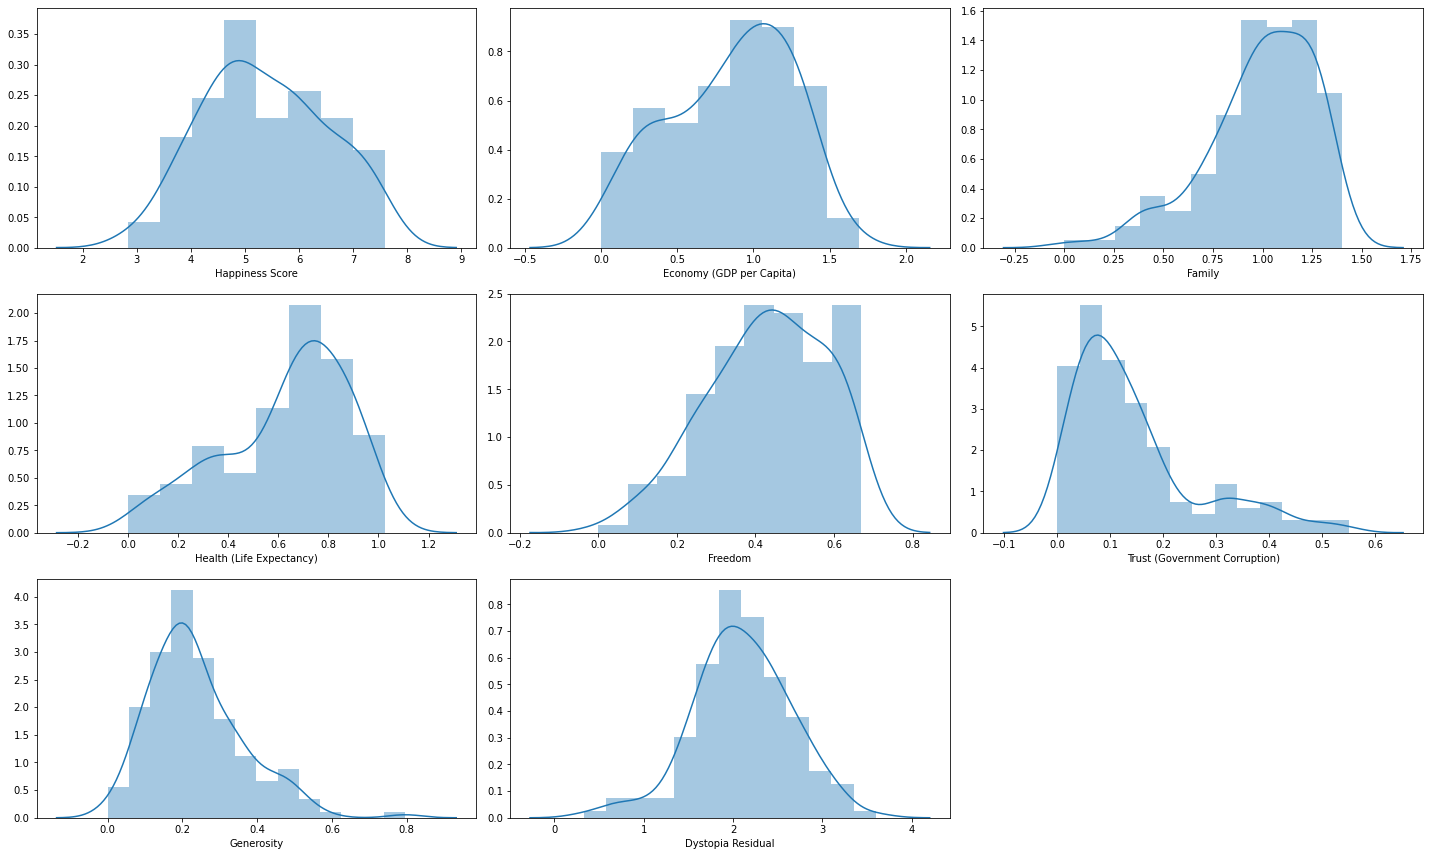

In [6]:
plt.figure(figsize=(20,12))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

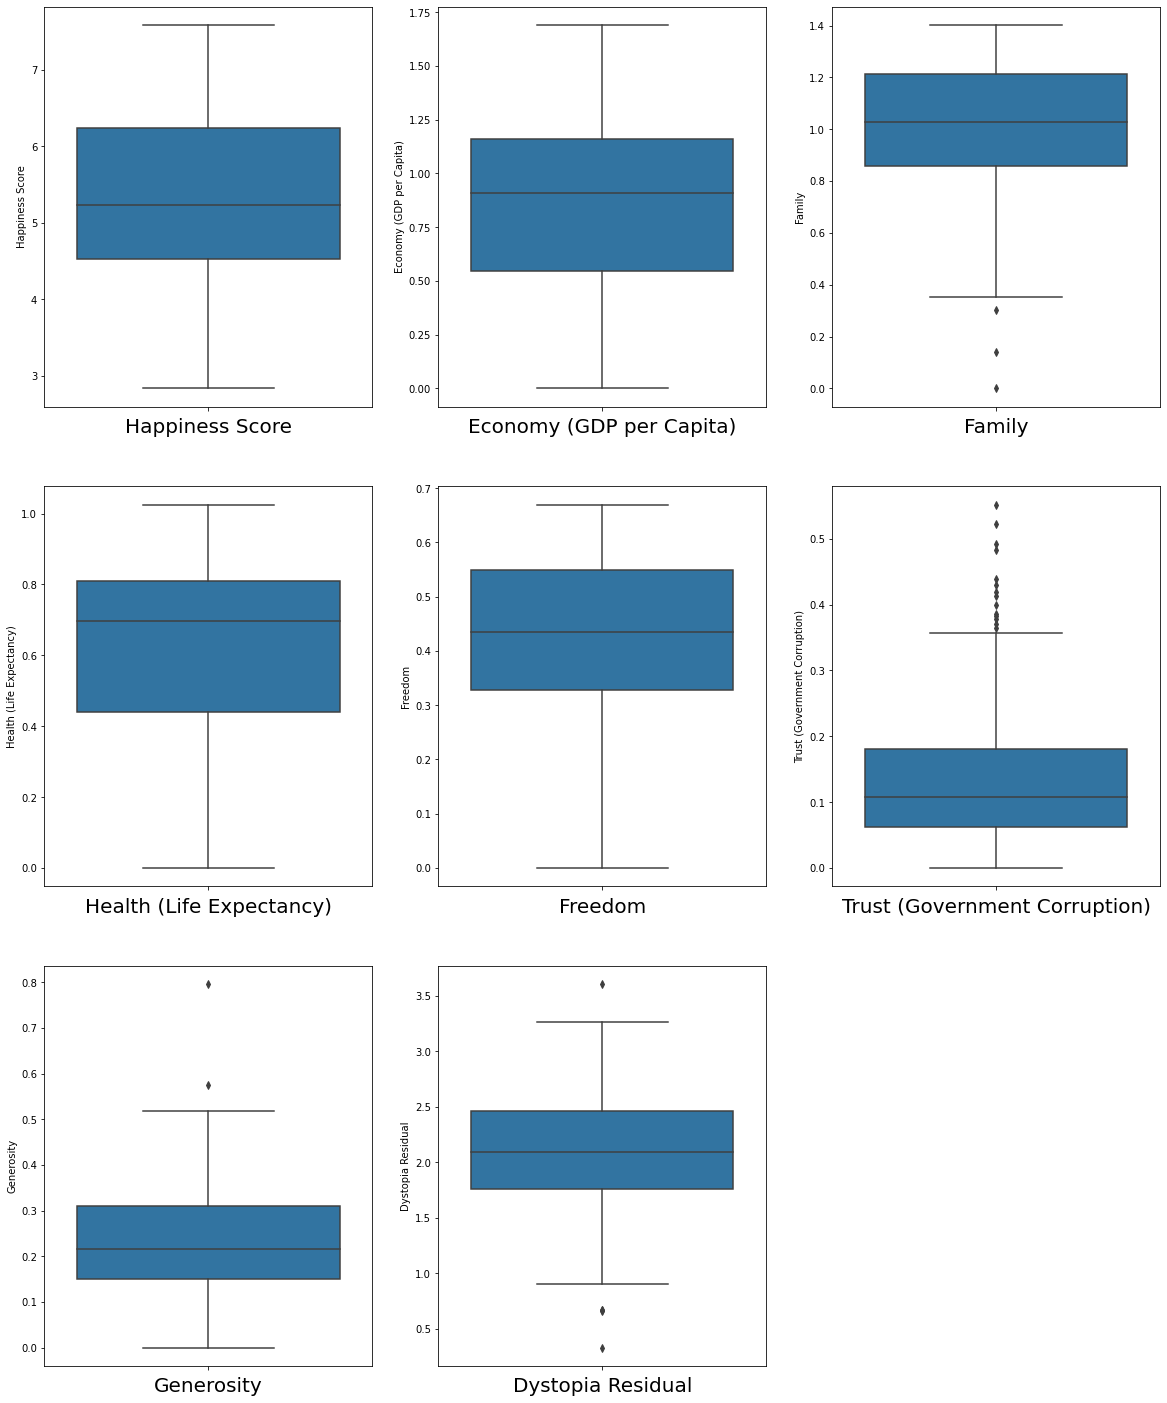

In [7]:
plt.figure(figsize=(20,25))
graph=1
for column in data:
    if graph<=9:
        ax=plt.subplot(3,3,graph)
        sns.boxplot(data[column],orient="v")
        plt.xlabel(column,fontsize=20)
    graph+=1
plt.show()

In [8]:
data.rename(columns=({ 'Trust (Government Corruption)': 'trust',"Dystopia Residual": "residual"}), 
    inplace=True)

In [9]:
data.head(10)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,trust,Generosity,residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [18]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
iqr

fmly=(q1.Family-1.5*iqr.Family)
index=np.where(data["Family"]<fmly)
data=data.drop(data.index[index])
data.reset_index()
trst=(q3.trust+1.5*iqr.trust)
index=np.where(data["trust"]>trst)
data=data.drop(data.index[index])
data.reset_index()
Generositty=(q3.Generosity+1.5*iqr.Generosity)
index=np.where(data["Generosity"]>Generositty)
data=data.drop(data.index[index])
data.reset_index()
resd=(q3.residual+1.5*iqr.residual)
index=np.where(data["residual"]>resd)
data=data.drop(data.index[index])
data.reset_index()
resdi=(q1.residual-1.5*iqr.residual)
index=np.where(data["residual"]<resdi)
data=data.drop(data.index[index])
data.reset_index()
fred=(q1.Freedom-1.5*iqr.Freedom)
index=np.where(data["Freedom"]<fred)
data=data.drop(data.index[index])
data.reset_index()

,index,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,trust,Generosity,residual
0,1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,10,7.278,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
2,11,7.226,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
3,12,7.200,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320
4,14,7.119,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011
...,...,...,...,...,...,...,...,...,...
114,148,3.667,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
115,149,3.656,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
116,150,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
117,151,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


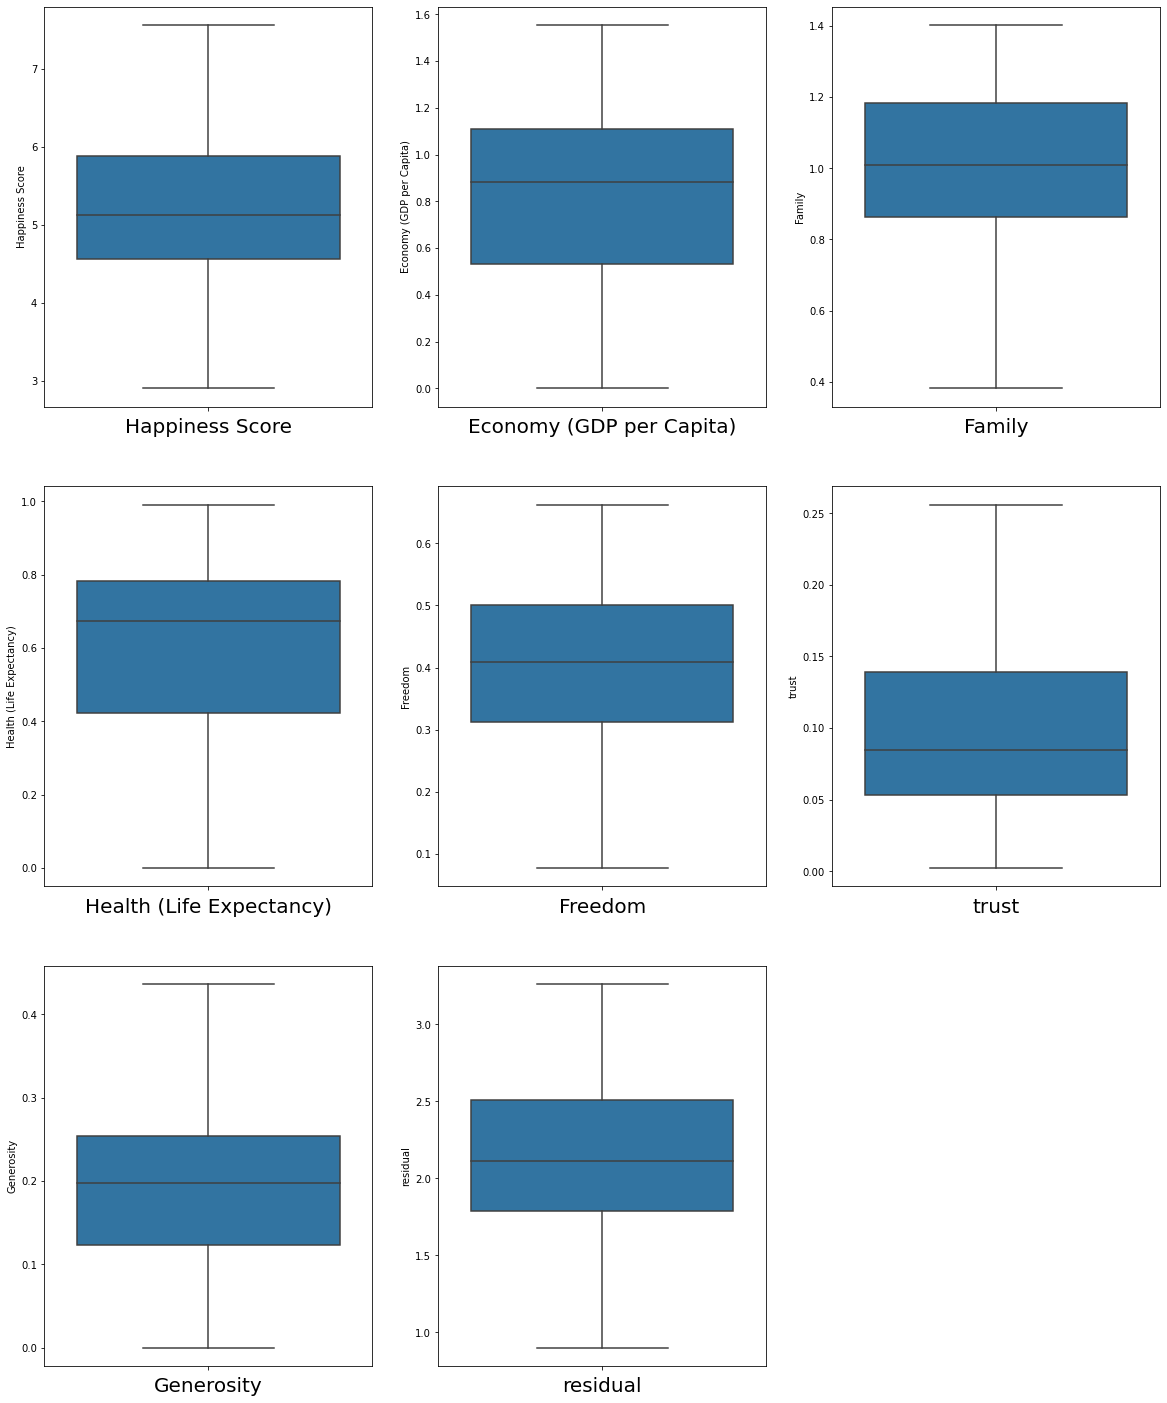

In [19]:
plt.figure(figsize=(20,25))
graph=1
for column in data:
    if graph<=9:
        ax=plt.subplot(3,3,graph)
        sns.boxplot(data[column],orient="v")
        plt.xlabel(column,fontsize=20)
    graph+=1
plt.show()

In [20]:
# having removed the bad data , we are good to go .

In [21]:
y=data["Happiness Score"]
x=data.drop(columns=["Happiness Score"])


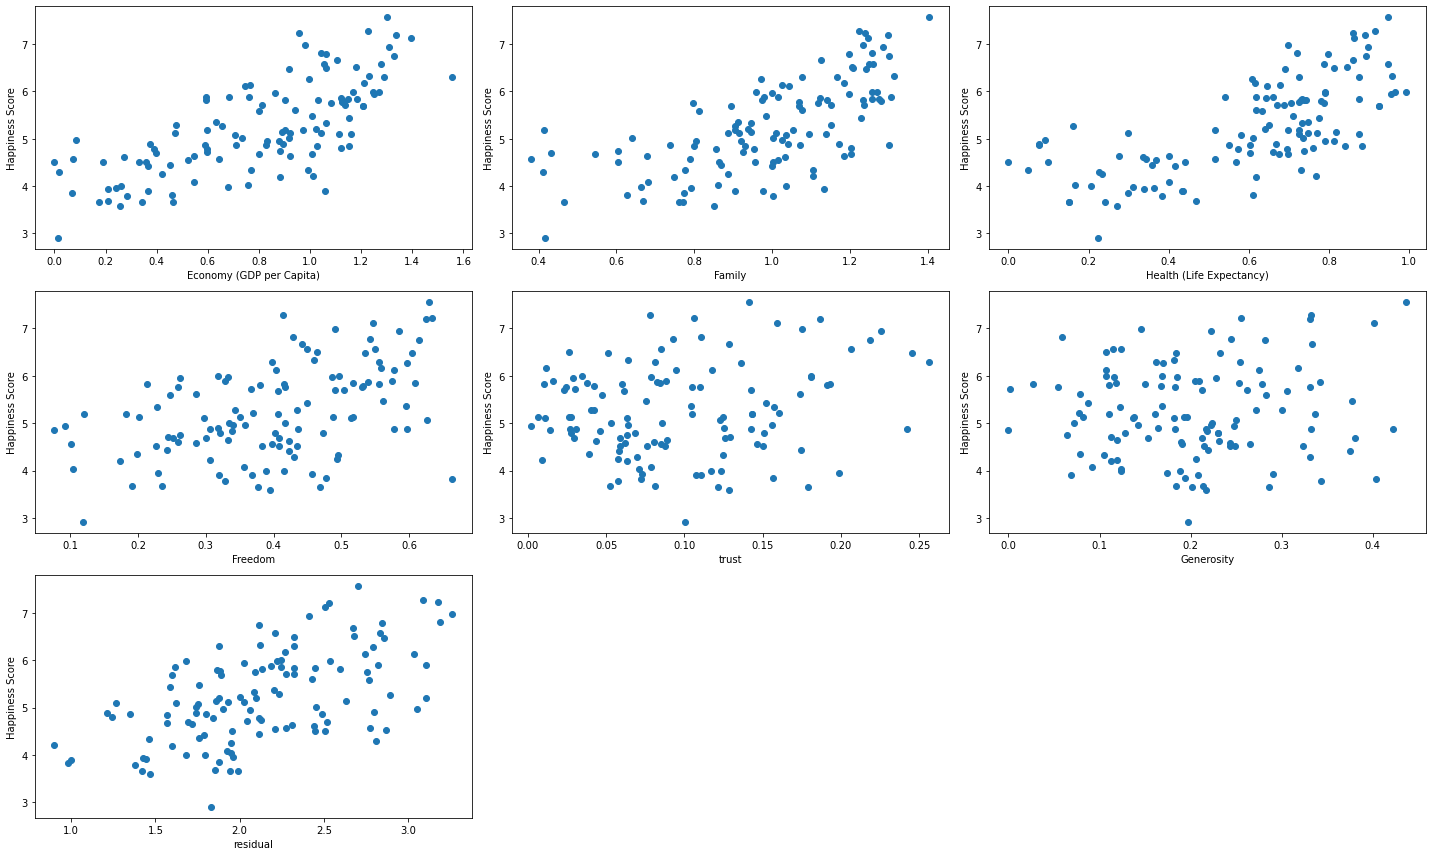

In [22]:
plt.figure(figsize=(20,12))
plotnumber=1
for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel("Happiness Score")
    plotnumber+=1
plt.tight_layout()

In [45]:
# generosity andtrust are not showing much good relation here .
y=data["Happiness Score"]
x=data.drop(columns=["Happiness Score","Generosity","trust"])
sc=StandardScaler()
new_x=sc.fit_transform(x)

In [46]:
x_train,x_test,y_train,y_test=train_test_split(new_x,y,test_size=0.25,random_state=41)

In [47]:
regression=LinearRegression()
regression.fit(x_train,y_train)


LinearRegression()

In [48]:
y_pred=regression.predict(x_test)

In [49]:
y_pred

array([5.366425  , 5.93781624, 2.83342933, 5.58905697, 5.9879665 ,
       4.90346566, 6.37644845, 4.48229772, 4.84068902, 3.84462225,
       4.81271352, 6.83177924, 5.47110764, 5.06912786, 5.95655602,
       4.47140416, 5.90157881, 3.98963279, 4.95466489, 5.48788658,
       3.76391293, 5.89533483, 5.90773382, 5.09525007, 3.67355521,
       7.35217504, 5.65525917, 4.7691152 , 5.90494633, 5.81936506])

In [50]:
y_test

70     5.477
63     5.716
156    2.905
65     5.695
55     5.833
100    4.867
35     6.329
119    4.517
106    4.739
139    3.956
99     4.874
18     6.937
72     5.429
88     5.098
46     5.984
109    4.686
61     5.759
136    4.033
80     5.194
74     5.360
144    3.819
49     5.948
54     5.848
89     5.073
145    3.781
1      7.561
60     5.770
105    4.786
59     5.791
64     5.709
Name: Happiness Score, dtype: float64

In [51]:
regression.score(x_train,y_train)

0.991536383710047

In [52]:
regression.score(x_test,y_test)

0.9855263156048764

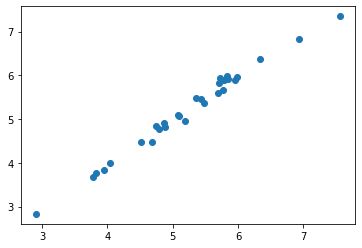

In [53]:
plt.scatter(y_test,y_pred)

In [ ]:
#this the the best predicted model I came up with showing the accuracy upto 98%